In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style("darkgrid")

In [41]:
os.listdir("../Scikitlearn/Linear Regression")

['.ipynb_checkpoints', 'medical_data.csv', 'Stage1.ipynb', 'Untitled.ipynb']

In [42]:
medical_data = pd.read_csv("../Scikitlearn/Linear Regression/medical_data.csv")

In [43]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
medical_data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

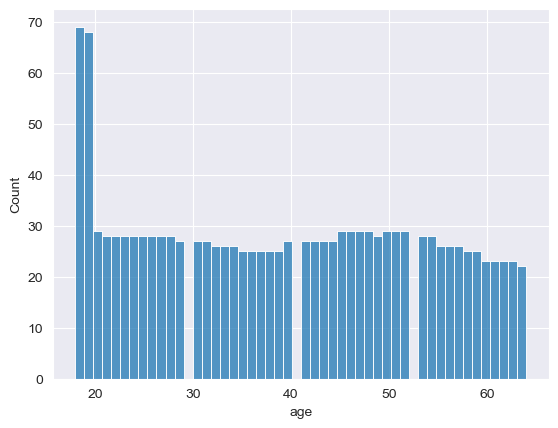

In [46]:
sns.histplot(data=medical_data, bins=50,stat="count", x="age")

<Axes: xlabel='bmi', ylabel='Count'>

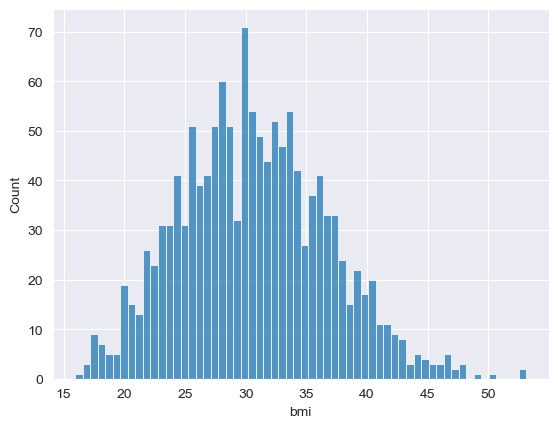

In [47]:
sns.histplot(data=medical_data, bins=60,stat="count", x="bmi")

<Axes: xlabel='charges', ylabel='Count'>

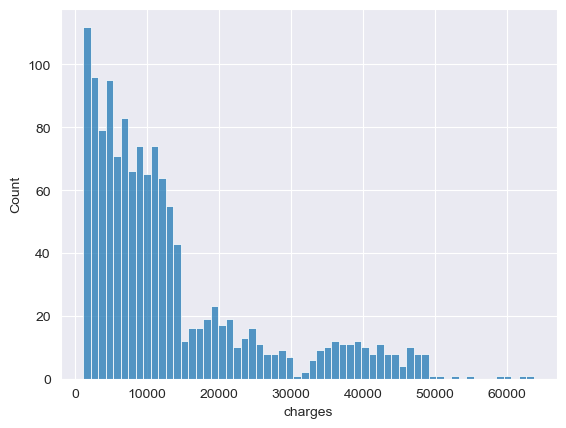

In [48]:
sns.histplot(data=medical_data, bins=60,stat="count", x="charges")

<Axes: xlabel='charges', ylabel='Count'>

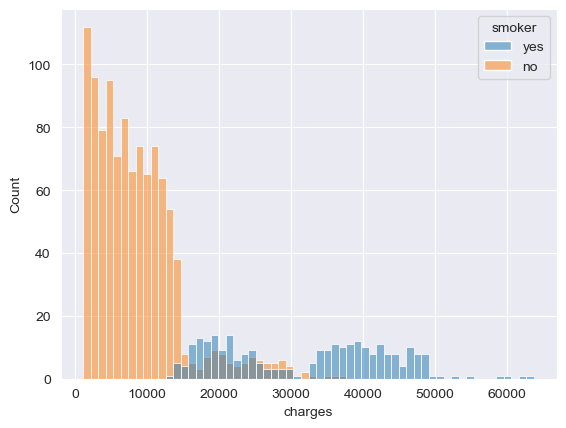

In [49]:
sns.histplot(data=medical_data, hue="smoker", bins=60,stat="count", x="charges")

In [50]:
medical_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

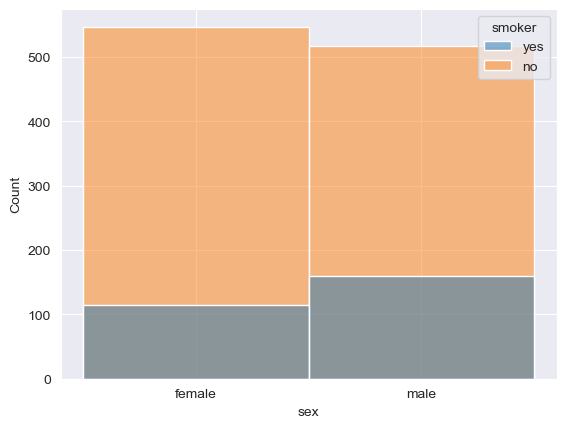

In [51]:
sns.histplot(data=medical_data, x="sex", hue="smoker")

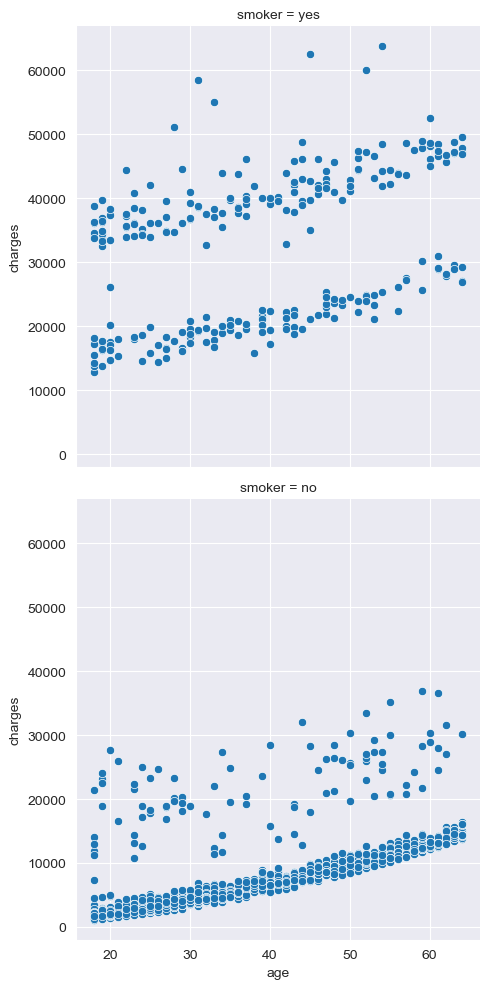

In [52]:
sns.relplot(medical_data, x="age", row="smoker", y="charges")

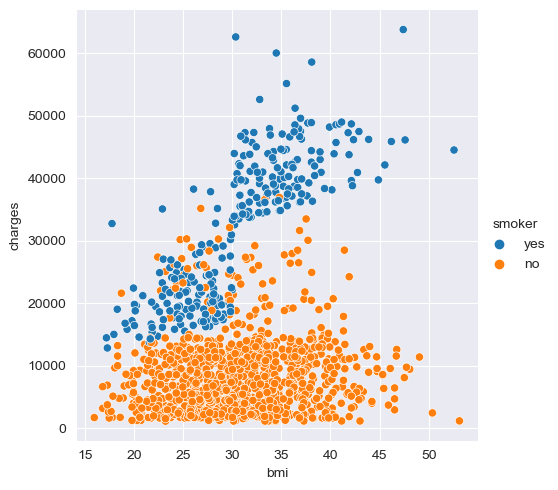

In [53]:
sns.relplot(medical_data, x="bmi", y="charges", hue="smoker")

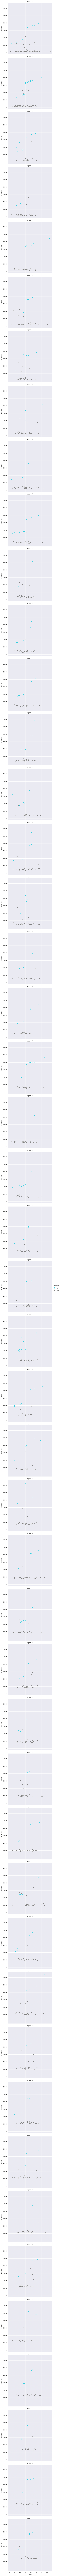

In [54]:
sns.relplot(medical_data, x="bmi", y="charges", hue="smoker", row="age", palette={"yes": "#32ccdd", "no": "gray"})

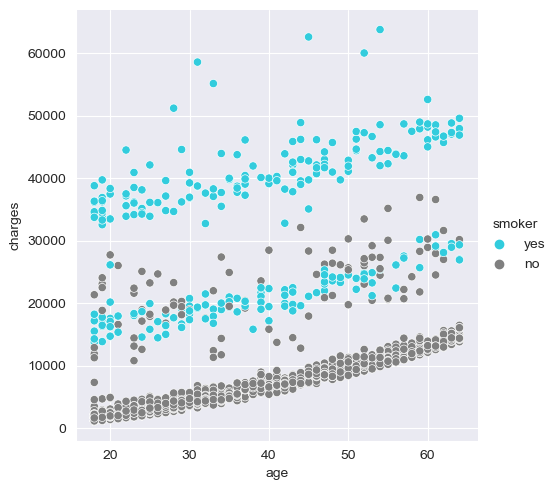

In [55]:
sns.relplot(medical_data, x="age", y="charges", hue="smoker", palette={"yes": "#32ccdd", "no": "gray"})

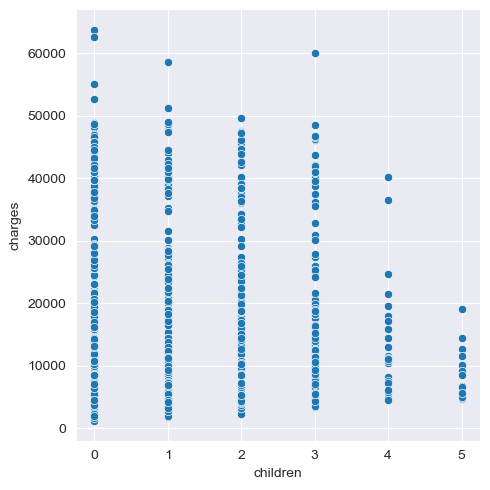

In [56]:
sns.relplot(medical_data, x="children", y="charges")

sns.violinplot(medical_data, x="children", y="charges")

In [57]:
medical_data.charges.corr(medical_data.age)

0.2990081933306476

In [58]:
medical_data.charges.corr(medical_data.bmi)

0.1983409688336288

In [59]:
smoker_values = {"yes": 1, "no": 0}
smoker_numeric = medical_data.smoker.map(smoker_values)

In [60]:
medical_data.charges.corr(smoker_numeric)

0.7872514304984785

In [61]:
non_smoker_df = medical_data[medical_data.smoker=="no"]

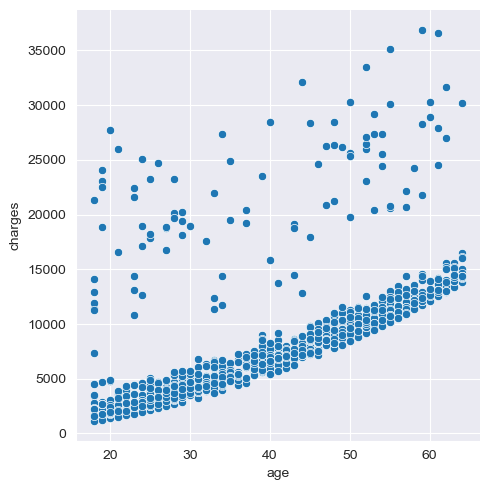

In [62]:
sns.relplot(non_smoker_df, x="age", y="charges")

In [63]:
def estimate_charges(age, a, b):
    return (a * age) + b

In [64]:
a = 5000
b =100

<Axes: xlabel='age', ylabel='charges'>

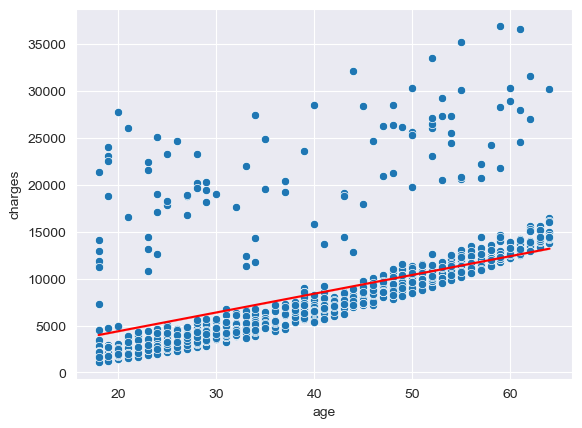

In [65]:
sns.scatterplot(x=non_smoker_df.age,  y=non_smoker_df.charges)
sns.lineplot(
    x=non_smoker_df.age, color="red", y=estimate_charges(non_smoker_df.age, 200, 390)
)

In [66]:
def try_parameters(a, b):
    prediction = estimate_charges(non_smoker_df.age, a, b)
    sns.relplot(kind="scatter", data=non_smoker_df, label="Actual", x="age", y="charges")
    sns.lineplot(x=non_smoker_df.age, label="Prediction", color="red", y=prediction)
    plt.legend()
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.show();

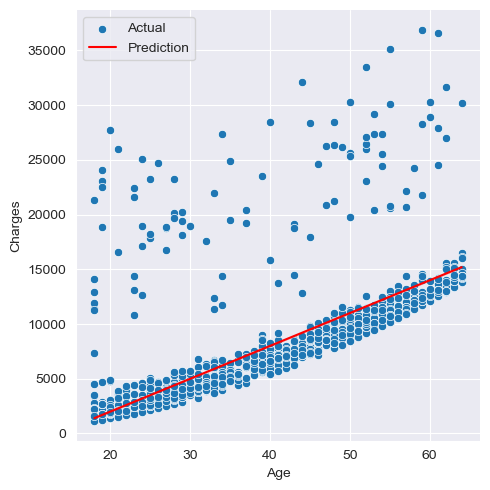

In [67]:
try_parameters(300, -4000)

In [68]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))
def try_parameters(a, b):
    prediction = estimate_charges(non_smoker_df.age, a, b)
    target = non_smoker_df.charges
    sns.relplot(
        kind="scatter", data=non_smoker_df, label="Actual", x="age", y="charges"
    )
    sns.lineplot(x=non_smoker_df.age, label="Prediction", color="red", y=prediction)
    plt.legend()
    plt.xlabel("Age")
    plt.ylabel("Charges")
    # RMSE
    rmse_error = rmse(target, prediction)
    print("RMSE Error: {:.2f}".format(rmse_error))
    plt.show()

RMSE Error: 4725.91


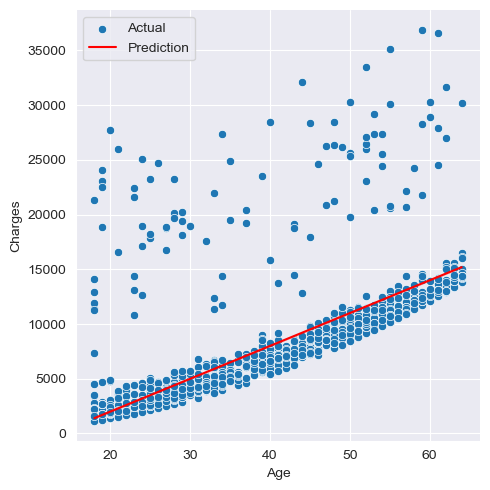

In [69]:
try_parameters(300, -4000)

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
model.fit(inputs, targets)

LinearRegression()

In [72]:
predictions =  model.predict(inputs)
rmse(target=targets, prediction=predictions)

4662.505766636395

In [73]:
model.predict(np.array([[32], [34], [43]]))

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6460.54465403, 6995.0424797 , 9400.28269518])

In [74]:
rmse(targets, predictions)

4662.505766636395

In [75]:
model.coef_

array([267.24891283])

In [76]:
model.intercept_

-2091.4205565650827

In [77]:
from sklearn.linear_model import SGDRegressor
modelB = SGDRegressor().fit(inputs, targets)
predictionsB = modelB.predict(inputs)

rmse(targets, predictionsB)

17456.04696057407

In [78]:
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

4662.3128354612945

Bmi does not really have much significant impact

In [79]:
inputs, targets = medical_data[["age", "bmi"]], medical_data["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

11374.110466839007

<Axes: xlabel='smoker', ylabel='charges'>

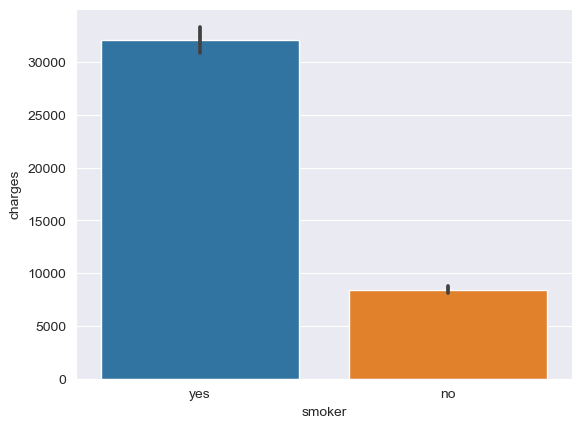

In [80]:
sns.barplot(medical_data, x="smoker", y="charges")

In [81]:
medical_data["smoker_code"] = medical_data["smoker"].map(smoker_values)

In [82]:
inputs, targets = (
    medical_data[["age", "bmi", "children", "smoker_code"]],
    medical_data["charges"],
)
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

6056.439217188081

In [83]:
sex_values = {"female": 0, "male": 1}
medical_data["sex_code"] = medical_data["sex"].map(sex_values)

In [84]:
inputs, targets = (
    medical_data[["age", "bmi", "children", "smoker_code", "sex_code"]],
    medical_data["charges"],
)
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

6056.100708754546

In [85]:
medical_data["region"].nunique()

4

In [86]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(medical_data[["region"]])

OneHotEncoder()

In [87]:
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [88]:
encoder.transform([["northeast"]]).toarray()

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0.]])

In [89]:
enc_categories = list(encoder.categories_[0])
enc_categories

['northeast', 'northwest', 'southeast', 'southwest']

In [90]:
medical_data[enc_categories] = encoder.transform(medical_data[["region"]]).toarray()

In [91]:
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [187]:
inputs, targets = (
    medical_data[["age", "bmi", "children", "smoker_code", "sex_code"]+enc_categories],
    medical_data["charges"],
)
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

6041.679651174452

In [188]:
weights_df = pd.DataFrame({
    "weight": np.append(model.coef_, model.intercept_),
    "feature": np.append(model.feature_names_in_, 1)
}).sort_values("weight", ascending=False)
weights_df

,weight,feature
3,23848.534542,smoker_code
5,587.009235,northeast
2,475.500545,children
1,339.193454,bmi
0,256.856353,age
6,234.045336,northwest
4,-131.314359,sex_code
8,-373.041756,southwest
7,-448.012814,southeast
9,-12525.547811,1


<Axes: xlabel='weight', ylabel='feature'>

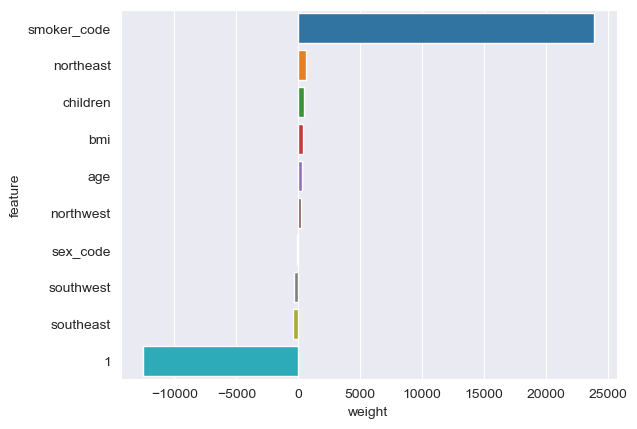

In [189]:
sns.barplot(weights_df, x="weight", y="feature")

### Feature Scaling

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
medical_data.select_dtypes(np.number)

,age,bmi,children,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0,0,0.0,0.0,0.0,1.0


In [192]:
numerical_cols = ["age", "bmi", "children"]
scaler = StandardScaler()
scaler.fit(medical_data[numerical_cols])

StandardScaler()

In [193]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [194]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [195]:
scaled_inputs = scaler.transform(medical_data[numerical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [196]:
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [197]:
cat_cols = ["smoker_code", "sex_code"] + encoder.categories_[0].tolist()
categorical_data = medical_data[cat_cols]

In [205]:
inputs, target = np.concatenate((scaled_inputs, categorical_data), axis=1), medical_data["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

6041.679651174452

In [217]:
weight_df = pd.DataFrame({
    "feature": np.append(numerical_cols + cat_cols, 1),
    "weight": np.append(model.coef_, model.intercept_)
}).sort_values("weight", ascending=False)
weight_df

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


<Axes: xlabel='weight', ylabel='feature'>

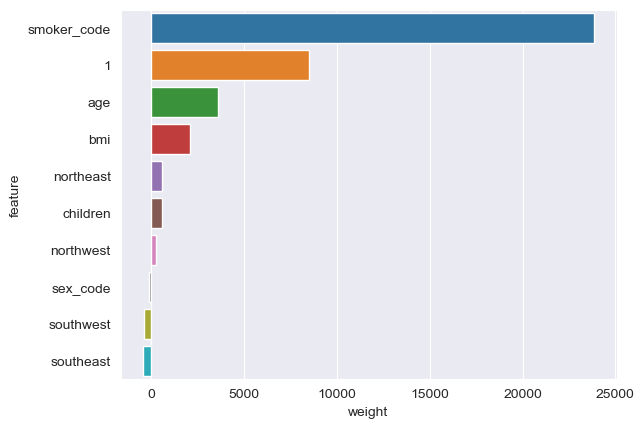

In [216]:
sns.barplot(weight_df, x="weight", y="feature")

In [227]:
n_c = [[23, 40, 56, 89, 10, 12]]
scaler.transform([[30, 12, 78]])

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.65555117, -3.06162724, 63.81941144]])

In [232]:
model.predict([[-0.65555117, -3.06162724, 63.81941144, 1, 0, 0, 1, 0, 0]])

array([60422.08658848])

In [224]:
len(cat_cols) + len(numerical_cols)

9